In [ ]:

from sklearn import preprocessing
import numpy as np
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation



from sklearn.model_selection import train_test_split
num_classes = 7 #'Angry','Disgust', 'Fear', 'Happy', 'Neutral', Sad', 'Surprise'

np.random.seed(2000)


In [ ]:
def prepare_data(filename):
  x,y=[],[]
  x_train,x_test,x_valid,y_train,y_test,y_valid=[],[],[],[],[],[]
  with open(filename) as f:
     c=f.readlines()
     lines=np.array(c)
     linecount=lines.size
     for i in range(1,linecount):
       emotion,distances=lines[i].split(',')
       distances=distances.strip()
       val=distances.split(' ')
       val=np.array(val)
       val=val.astype(np.float)

       emotion=keras.utils.to_categorical(emotion,num_classes)
       x.append(val)
       y.append(emotion)
     x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)
     

     minmax=preprocessing.MinMaxScaler()
     x_train=np.array(x_train)
     y_train=np.array(y_train)
     x_train=minmax.fit_transform(x_train)
     x_test=np.array(x_test)
     y_test=np.array(y_test)
     x_test=minmax.fit_transform(x_test)
     np.save('xtest',x_test)
     np.save('ytest',y_test)
     
     return x_train,y_train,x_test,y_test

In [ ]:

# Training and test data preparation  
x_train, y_train, x_test, y_test = prepare_data("/content/drive/My Drive/JAFFE_CK.csv")

print ("Training set size: ", str(len(x_train)))
print ("Test set size: ", str(len(x_test)))

Training set size:  741
Test set size:  365


In [ ]:
x_train

array([[0.        , 0.44662309, 0.47993019, ..., 0.2373678 , 0.11816193,
        0.        ],
       [0.        , 0.4379085 , 0.47353112, ..., 0.18507638, 0.24945295,
        0.        ],
       [0.        , 0.56753813, 0.61198371, ..., 0.2373678 , 0.22647702,
        0.        ],
       ...,
       [0.        , 0.33769063, 0.35776614, ..., 0.17626322, 0.21881838,
        0.        ],
       [0.        , 0.65577342, 0.76323444, ..., 0.47179788, 0.44420131,
        0.        ],
       [0.        , 0.4379085 , 0.40663176, ..., 0.35252644, 0.33479212,
        0.        ]])

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

model = Sequential()
model.add(Dense(512, input_shape=(4624,),activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(512,activation='relu'))


model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2368000   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 2,896,903
Trainable params: 2,896,903
Non-trainable params: 0
_________________________________________________________________


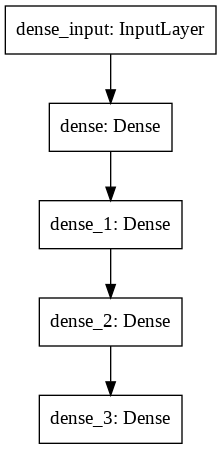

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
from keras.utils import plot_model


SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(model, show_shapes=False, show_layer_names=True, to_file='model.png')

In [ ]:

#compile the model
opt = keras.optimizers.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduction_lr = ReduceLROnPlateau(monitor = "val_loss",patience = 1 ,verbose = 1, factor = 0.1, min_lr = 0.0001)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=6, mode='auto')
history = model.fit(x_train, 
                      y_train,
                      epochs=100, 
                      verbose=1, 
                      batch_size=32,
                      validation_data=(x_test, y_test),
                    callbacks=[reduction_lr,early_stopper],
                    shuffle=False
                    ) 

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
24/24 [==============================] - 1s 31ms/step - loss: 1.6185 - accuracy: 0.5128 - val_loss: 1.4029 - val_accuracy: 0.5836
Epoch 2/100
24/24 [==============================] - 1s 25ms/step - loss: 1.4135 - accuracy: 0.5533 - val_loss: 1.2950 - val_accuracy: 0.5890
Epoch 3/100
24/24 [==============================] - 1s 24ms/step - loss: 1.3032 - accuracy: 0.5816 - val_loss: 1.2070 - val_accuracy: 0.6521
Epoch 4/100
24/24 [==============================] - 1s 24ms/step - loss: 1.2211 - accuracy: 0.6154 - val_loss: 1.1334 - val_accuracy: 0.6822
Epoch 5/100
24/24 [==============================] - 1s 24ms/step - loss: 1.1532 - accuracy: 0.6424 - val_loss: 1.0748 - val_accuracy: 0.7233
Epoch 6/100
24/24 [==============================] - 1s 24ms/step - loss: 1.0952 - accuracy: 0.6626 - val_loss: 1.0243 - val_accuracy: 0.7370
Epoch 7/100
24/24 [==============================] - 1s 24ms/step - loss: 1.0430 - accuracy: 0.6802 - val_loss: 0.9812 - val_accuracy: 0.7452
Epoch 

In [ ]:
model_json = model.to_json()
with open("fer_model.json", "w") as json_file:
 json_file.write(model_json)
model.save_weights("model_wts.h5")
#print("Saved model to disk")

In [ ]:
model.save('model-fer_.h5') 

In [ ]:
from google.colab import files
files.download("model-fer_.h5")

In [ ]:
files.download("fer_model.json")
files.download("model_wts.h5")